In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip drive/"My Drive"/dogs_cats/test1.zip

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import cv2
import os
import imutils

from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score ,accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from os import listdir
from os.path import isfile, join
import tensorflow

In [6]:
rawImages = []
labels = []

In [8]:
mypath = 'train/'
imagePaths = [mypath+f for f in listdir(mypath) if isfile(join(mypath, f))]

In [9]:
batch_size = 32
num_classes = 2
epochs = 2
data_augmentation = True
num_predictions = 20
width = 150
height = 150
#images = np.empty((0, 150,150,3))
labels = []
rawImage = []

In [10]:
for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    label = imagePath.split('/')[1].split('.')[0]
    image = cv2.resize(image, (width,height))
    
    #images = np.append(images, [image], axis=0)
    labels.append(label)
    rawImage.append(image)
    
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

[INFO] processed 1000/25000
[INFO] processed 2000/25000
[INFO] processed 3000/25000
[INFO] processed 4000/25000
[INFO] processed 5000/25000
[INFO] processed 6000/25000
[INFO] processed 7000/25000
[INFO] processed 8000/25000
[INFO] processed 9000/25000
[INFO] processed 10000/25000
[INFO] processed 11000/25000
[INFO] processed 12000/25000
[INFO] processed 13000/25000
[INFO] processed 14000/25000
[INFO] processed 15000/25000
[INFO] processed 16000/25000
[INFO] processed 17000/25000
[INFO] processed 18000/25000
[INFO] processed 19000/25000
[INFO] processed 20000/25000
[INFO] processed 21000/25000
[INFO] processed 22000/25000
[INFO] processed 23000/25000
[INFO] processed 24000/25000


In [11]:
images_array = np.array(rawImage)
images_array.shape

(25000, 150, 150, 3)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(images_array, np.array(labels), test_size=0.3)

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [22]:
print(X_train.shape)

(17500, 150, 150, 3)


In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

model.load_weights("/content/drive/My Drive/dogs_cats/dogs_cats2.h5")

(1, 150, 150, 3)


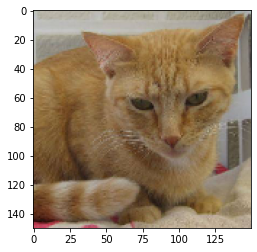

[[0.78705263 0.21231863]]


In [16]:
#######
img_path = 'test1/45.jpg'
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.
# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()
prediction = model.predict(img_tensor)
print(prediction)

In [17]:
#####
for i in range(1,501):
  img_path = 'test1/'+str(i)+'.jpg'
  # We preprocess the image into a 4D tensor
  from keras.preprocessing import image
  import numpy as np
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  # Remember that the model was trained on inputs
  # that were preprocessed in the following way:
  img_tensor /= 255.
  prediction = model.predict(img_tensor)
  print(i,' : ',prediction)
  if(prediction[0][0]>prediction[0][1]):
    print('cat')
  else:
    print('dog')

1  :  [[0.23534155 0.7658788 ]]
dog
2  :  [[0.01020235 0.9897748 ]]
dog
3  :  [[0.00355899 0.9964613 ]]
dog
4  :  [[0.00492847 0.9949022 ]]
dog
5  :  [[0.99852335 0.00147489]]
cat
6  :  [[0.5577548  0.44127718]]
cat
7  :  [[9.9993014e-01 7.0429473e-05]]
cat
8  :  [[3.6805868e-04 9.9963236e-01]]
dog
9  :  [[9.9999976e-01 2.6364822e-07]]
cat
10  :  [[0.86836904 0.13146299]]
cat
11  :  [[0.99772036 0.00228971]]
cat
12  :  [[0.04339424 0.95501685]]
dog
13  :  [[9.9954629e-01 4.5713782e-04]]
cat
14  :  [[9.9959838e-01 4.0122867e-04]]
cat
15  :  [[0.7998235  0.19957489]]
cat
16  :  [[9.9997818e-01 2.1742922e-05]]
cat
17  :  [[1.1338341e-05 9.9998868e-01]]
dog
18  :  [[0.00832364 0.9917319 ]]
dog
19  :  [[0.08026075 0.9194686 ]]
dog
20  :  [[9.9985367e-01 1.4901161e-04]]
cat
21  :  [[0.03157797 0.9683188 ]]
dog
22  :  [[0.99461675 0.00544414]]
cat
23  :  [[2.0781004e-05 9.9997807e-01]]
dog
24  :  [[3.9100647e-04 9.9961352e-01]]
dog
25  :  [[0.44552213 0.5547123 ]]
dog
26  :  [[0.9641986  0.03